<a href="https://www.kaggle.com/code/oakthyago/analysing-data?scriptVersionId=109025158" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv("../input/solarenergynortheastbrazil/Sevem e Marcelo.csv")
df2 = pd.read_csv("../input/solarenergynortheastbrazil/Paulino.csv")
df3 = pd.read_csv("../input/solarenergynortheastbrazil/Lindalva.csv")
df4 = pd.read_csv("../input/solarenergynortheastbrazil/Tubarao.csv")
df5 = pd.read_csv("../input/solarenergynortheastbrazil/Vinicius.csv")

# Introduction

On the graphic bellow we can notice that the daily power production of a photovoltaic system its not a continues function this ups and downs happens because of the clouds that block and unblock the sun direct contact with the fotovoltaic module.

- Its necessary to get a continuos function to see if the curve of production of the system is as espected to be. To do it is necessary to get a period of days and get the biggest production number of a interval intenting to constructe a continuos curve.

<AxesSubplot:>

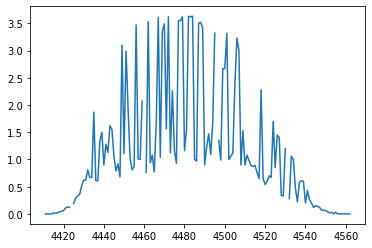

In [3]:
df[df["Date"] == "2022-10-08"]["Production（kW）"].plot()

In [4]:
#pd.set_option('display.max_rows', df.shape[0]+1)

df2['Date'] = df2['Time'].apply(lambda x: x.split(' ')[0])
df2['Hour'] = df2['Time'].apply(lambda x: x.split(' ')[1])
df2['Hour'] = pd.to_datetime(df2['Hour'], format='%H:%M')
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m/%d')


In [5]:
df2

,Unnamed: 0,Time,Production（kW）,Consumption（kW）,Temperature（℃）,Weather,Date,Hour
0,0,2022/08/01 02:20,NaN,NaN,20.0,Cloudy,2022-08-01,1900-01-01 02:20:00
1,1,2022/08/01 05:20,NaN,NaN,20.0,Cloudy,2022-08-01,1900-01-01 05:20:00
2,2,2022/08/01 11:20,NaN,NaN,27.0,Cloudy,2022-08-01,1900-01-01 11:20:00
3,3,2022/08/01 14:20,NaN,NaN,27.0,Cloudy,2022-08-01,1900-01-01 14:20:00
4,4,2022/08/01 14:47,1.42,0.0,NaN,NaN,2022-08-01,1900-01-01 14:47:00
...,...,...,...,...,...,...,...,...
9530,9530,2022/10/08 17:25,0.00,0.0,NaN,NaN,2022-10-08,1900-01-01 17:25:00
9531,9531,2022/10/08 17:30,0.00,0.0,NaN,NaN,2022-10-08,1900-01-01 17:30:00
9532,9532,2022/10/08 17:35,0.00,0.0,NaN,NaN,2022-10-08,1900-01-01 17:35:00
9533,9533,2022/10/08 20:20,NaN,NaN,22.0,Sunny,2022-10-08,1900-01-01 20:20:00


In [6]:

df2["Date"]=pd.to_datetime(df2["Time"]).dt.date

In [7]:
#df["Date"] = df["Date"].date

In [8]:
df

,Unnamed: 0,Time,Production（kW）,Consumption（kW）,Temperature（℃）,Weather,Date,Hour
0,0,2022/09/10 00:02,NaN,NaN,20.0,Cloudy,2022-09-10,1900-01-01 00:02:00
1,1,2022/09/10 03:02,NaN,NaN,19.0,Cloudy,2022-09-10,1900-01-01 03:02:00
2,2,2022/09/10 05:05,0.0,0.0,NaN,NaN,2022-09-10,1900-01-01 05:05:00
3,3,2022/09/10 05:10,0.0,0.0,NaN,NaN,2022-09-10,1900-01-01 05:10:00
4,4,2022/09/10 05:15,0.0,0.0,NaN,NaN,2022-09-10,1900-01-01 05:15:00
...,...,...,...,...,...,...,...,...
4560,4560,2022/10/08 17:30,0.0,0.0,NaN,NaN,2022-10-08,1900-01-01 17:30:00
4561,4561,2022/10/08 17:35,0.0,0.0,NaN,NaN,2022-10-08,1900-01-01 17:35:00
4562,4562,2022/10/08 17:40,0.0,0.0,NaN,NaN,2022-10-08,1900-01-01 17:40:00
4563,4563,2022/10/08 18:02,NaN,NaN,24.0,Sunny,2022-10-08,1900-01-01 18:02:00


In [9]:
#sns.jointplot(x='Hour', y="Production（kW）",data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  f.tight_layout()
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


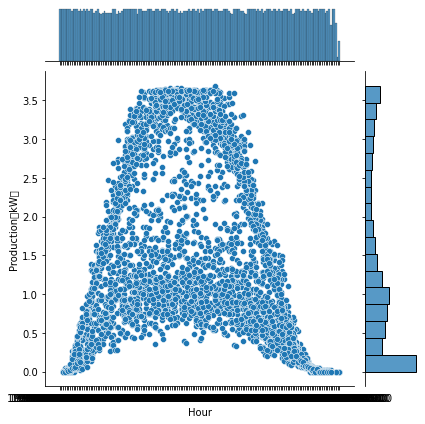

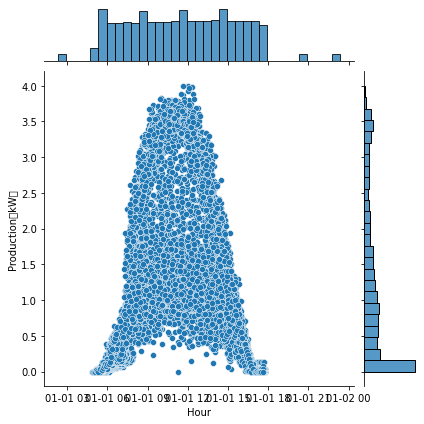

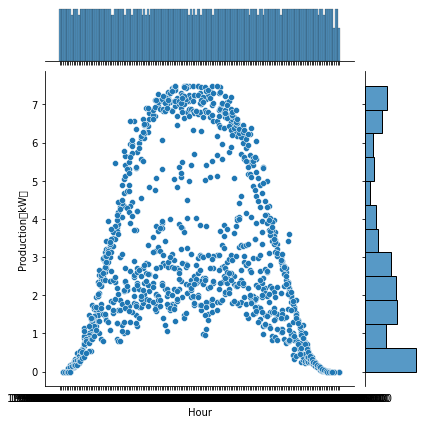

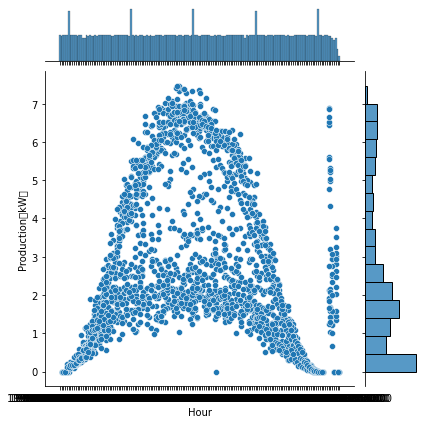

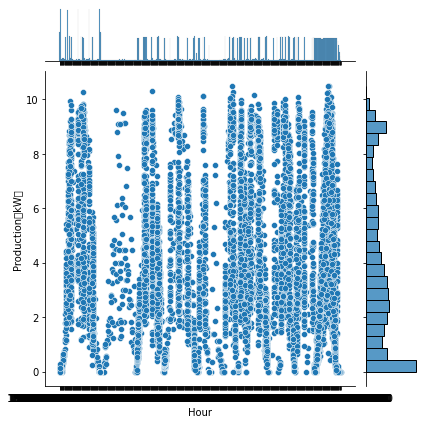

In [10]:
sns.jointplot(x='Hour', y="Production（kW）",data=df)
sns.jointplot(x='Hour', y="Production（kW）",data=df2)
sns.jointplot(x='Hour', y="Production（kW）",data=df3)
sns.jointplot(x='Hour', y="Production（kW）",data=df4)
sns.jointplot(x='Hour', y="Production（kW）",data=df5)


In [11]:
#pd.set_option('display.max_rows', df2.shape[0]+1)
#sns.jointplot(x='Hour', y="Production（kW）",data=df3)
#df2["Hour"].value_counts()